get data from open

In [2]:
# !wget https://www.mhlw.go.jp/content/12400000/000607901.xlsx

--2024-10-27 16:29:20--  https://www.mhlw.go.jp/content/12400000/000607901.xlsx
Resolving www.mhlw.go.jp (www.mhlw.go.jp)... 184.26.210.77, 2600:140b:1c00:1492::3194, 2600:140b:1c00:14b3::3194
Connecting to www.mhlw.go.jp (www.mhlw.go.jp)|184.26.210.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116795 (114K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘000607901.xlsx’

000607901.xlsx      100%[===================>] 114.06K  --.-KB/s    in 0.02s   

2024-10-27 16:29:20 (4.95 MB/s) - ‘000607901.xlsx’ saved [116795/116795]



In [3]:
# !wget https://www.mhlw.go.jp/content/12400000/000539674.xlsx

--2024-10-27 16:29:21--  https://www.mhlw.go.jp/content/12400000/000539674.xlsx
Resolving www.mhlw.go.jp (www.mhlw.go.jp)... 184.26.210.77, 2600:140b:1c00:1492::3194, 2600:140b:1c00:14b3::3194
Connecting to www.mhlw.go.jp (www.mhlw.go.jp)|184.26.210.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133985 (131K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘000539674.xlsx’

000539674.xlsx      100%[===================>] 130.84K  --.-KB/s    in 0.03s   

2024-10-27 16:29:21 (4.82 MB/s) - ‘000539674.xlsx’ saved [133985/133985]



In [22]:
import pandas as pd

In [23]:
f = "./000539674.xlsx"

In [24]:
df_org = pd.read_excel(f, sheet_name="外来")
df_org.head()

,診療年月：H30年04月～H31年03月 Ｅ 画像診断 外来 ※集計結果が10未満の場合は「‐」で表示（10未満の箇所が1箇所の場合は10以上の最小値を全て「‐」で表示）※集計対象期間内に名称や点数・金額等に変更がある場合、集計対象期間当初の情報で表示,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,分類\nコード,分類名称,診療行為\nコード,診療行為,点数,総計,01,02,03,04,...,38,39,40,41,42,43,44,45,46,47
2,NaN,NaN,NaN,NaN,NaN,NaN,北海道,青森県,岩手県,宮城県,...,愛媛県,高知県,福岡県,佐賀県,長崎県,熊本県,大分県,宮崎県,鹿児島県,沖縄県
3,E000,透視診断,170000310,透視診断,110,235410,7066,4685,3231,5196,...,3084,1177,14359,2115,1890,2006,2275,2304,3492,2492
4,E001,写真診断,170000410,単純撮影（イ）の写真診断,85,69614130,3817740,840265,764836,1394591,...,796151,412345,3326365,551850,814854,1069548,814469,726125,976038,687995


process data as we can use as dataframe.

In [25]:
df = pd.read_excel(f, sheet_name="外来", skiprows=2, dtype="object")
cols1 = df.columns
cols2 = df.loc[0,:]
cols2 = [c if c ==c else "" for c in cols2]
# df.head()
# print(cols1[0:6])
# = ["categ_code", "categ_name", "si_code", "si_name", "point", "totalcount"]
cols1_fix = ["categ_code", "categ_name", "si_code", "si_name", "point", "totalcount"] + list(cols1[6:])
cols1_fix
cols = [c1 + "_" + c2 if c2 != "" else c1 for c1, c2 in zip(cols1_fix, cols2)]
# cols
df.columns = cols
df = df.query("si_code == si_code")\
    .assign(categ_code = lambda df:df.categ_code.ffill(),
            categ_name = lambda df:df.categ_name.ffill())

cols_num_fix = df.columns[5:]
# cols_num_fix
for cf in cols_num_fix:
    # print(cf)
    df[[cf]] = df[[cf]].replace("-", "0").astype(float)
# df["si_code"]
# cols_num_fix

define the function the process above

In [26]:
df.head()

,categ_code,categ_name,si_code,si_name,point,totalcount,01_北海道,02_青森県,03_岩手県,04_宮城県,...,38_愛媛県,39_高知県,40_福岡県,41_佐賀県,42_長崎県,43_熊本県,44_大分県,45_宮崎県,46_鹿児島県,47_沖縄県
1,E000,透視診断,170000310,透視診断,110,235410.0,7066.0,4685.0,3231.0,5196.0,...,3084.0,1177.0,14359.0,2115.0,1890.0,2006.0,2275.0,2304.0,3492.0,2492.0
2,E001,写真診断,170000410,単純撮影（イ）の写真診断,85,69614130.0,3817740.0,840265.0,764836.0,1394591.0,...,796151.0,412345.0,3326365.0,551850.0,814854.0,1069548.0,814469.0,726125.0,976038.0,687995.0
3,E001,写真診断,170000510,単純撮影（ロ）の写真診断,43,30452100.0,1309236.0,281484.0,245393.0,497498.0,...,366148.0,181094.0,1406979.0,213865.0,338842.0,452073.0,278315.0,279615.0,381838.0,328381.0
4,E001,写真診断,170000610,特殊撮影の写真診断,96,36956.0,6306.0,246.0,213.0,120.0,...,464.0,79.0,1263.0,587.0,355.0,52.0,312.0,91.0,150.0,84.0
5,E001,写真診断,170000730,特殊撮影の写真診断（他方と同時併施）,48,79202.0,3444.0,823.0,883.0,921.0,...,579.0,429.0,4684.0,1432.0,590.0,343.0,499.0,293.0,596.0,214.0


In [27]:
def f2df_47(f, sheet_name):
    df = pd.read_excel(f, sheet_name=sheet_name, skiprows=2, dtype="object")
    cols1 = df.columns
    cols2 = df.loc[0,:]
    cols2 = [c if c ==c else "" for c in cols2]
    
    # df.head()
    # print(cols1[0:6])
    # = ["categ_code", "categ_name", "si_code", "si_name", "point", "totalcount"]
    cols1_fix = ["categ_code", "categ_name", "si_code", "si_name", "point", "totalcount"] + list(cols1[6:])
    cols1_fix
    cols = [c1 + "_" + c2 if c2 != "" else c1 for c1, c2 in zip(cols1_fix, cols2)]
    # cols
    df.columns = cols
    df = df.query("si_code == si_code")\
        .assign(categ_code = lambda df:df.categ_code.ffill(),
                categ_name = lambda df:df.categ_name.ffill())

    cols_num_fix = df.columns[5:]
    # cols_num_fix
    for cf in cols_num_fix:
        # print(cf)
        df[[cf]] = df[[cf]].replace("-", "0").astype(float)
    return df

In [28]:
df_47 = f2df_47(f=f, sheet_name="外来")

In [29]:
df_47.head()

,categ_code,categ_name,si_code,si_name,point,totalcount,01_北海道,02_青森県,03_岩手県,04_宮城県,...,38_愛媛県,39_高知県,40_福岡県,41_佐賀県,42_長崎県,43_熊本県,44_大分県,45_宮崎県,46_鹿児島県,47_沖縄県
1,E000,透視診断,170000310,透視診断,110,235410.0,7066.0,4685.0,3231.0,5196.0,...,3084.0,1177.0,14359.0,2115.0,1890.0,2006.0,2275.0,2304.0,3492.0,2492.0
2,E001,写真診断,170000410,単純撮影（イ）の写真診断,85,69614130.0,3817740.0,840265.0,764836.0,1394591.0,...,796151.0,412345.0,3326365.0,551850.0,814854.0,1069548.0,814469.0,726125.0,976038.0,687995.0
3,E001,写真診断,170000510,単純撮影（ロ）の写真診断,43,30452100.0,1309236.0,281484.0,245393.0,497498.0,...,366148.0,181094.0,1406979.0,213865.0,338842.0,452073.0,278315.0,279615.0,381838.0,328381.0
4,E001,写真診断,170000610,特殊撮影の写真診断,96,36956.0,6306.0,246.0,213.0,120.0,...,464.0,79.0,1263.0,587.0,355.0,52.0,312.0,91.0,150.0,84.0
5,E001,写真診断,170000730,特殊撮影の写真診断（他方と同時併施）,48,79202.0,3444.0,823.0,883.0,921.0,...,579.0,429.0,4684.0,1432.0,590.0,343.0,499.0,293.0,596.0,214.0


In [30]:
# f_age = "./000607901.xlsx"
# df_age = f2df_47(f_age, sheet_name="外来")

how about age table?

In [31]:
f_age = "./000607901.xlsx"
df = pd.read_excel(f_age, sheet_name="外来", skiprows=2, dtype="object")
cols1 = df.columns
cols2 = df.loc[0,:]
cols2 = [c if c ==c else "" for c in cols2]

# print(cols)
# df.head()
# print(cols1[0:6])
# = ["categ_code", "categ_name", "si_code", "si_name", "point", "totalcount"]
cols1_fix = ["categ_code", "categ_name", "si_code", "si_name", "point", "totalcount"] + list(cols1[6:])
# cols1_fix = [c if "Unnamed:" not in c else "" for c in cols1_fix]
d_gen = {
    "男":"male",
    0:"male",
    "女":"female",
    1:"female",
}
cols1_fix2 = []
for i, c in enumerate(cols1_fix):
    if "Unnamed:" in c and i <= 24:
        cols1_fix2.append("male")
    elif "Unnamed:" in c and 25 <= i:
        cols1_fix2.append("female")
    elif c == "男":
        cols1_fix2.append("male")
    elif c == "女":
        cols1_fix2.append("female")
    else:
        cols1_fix2.append(c)
        
# print(cols1_fix2)
# cols1_fix = [c if "Unnamed:" not in c else "" for c in cols1_fix]
cols = [c1 + "_" + c2 if c2 != "" else c1 for c1, c2 in zip(cols1_fix2, cols2)]
# cols
df.columns = cols
df = df.query("si_code == si_code")\
    .assign(categ_code = lambda df:df.categ_code.ffill(),
            categ_name = lambda df:df.categ_name.ffill())

cols_num_fix = df.columns[5:]
# cols_num_fix
for cf in cols_num_fix:
    # print(cf)
    df[[cf]] = df[[cf]].replace("-", "0").astype(float)

In [32]:
df.head()

,categ_code,categ_name,si_code,si_name,point,totalcount,male_0～4歳,male_5～9歳,male_10～14歳,male_15～19歳,...,female_45～49歳,female_50～54歳,female_55～59歳,female_60～64歳,female_65～69歳,female_70～74歳,female_75～79歳,female_80～84歳,female_85～89歳,female_90歳以上
1,E000,透視診断,170000310,透視診断,110,235410.0,2140.0,1054.0,821.0,1024.0,...,4118.0,4781.0,5663.0,7274.0,12035.0,14431.0,15864.0,14514.0,11607.0,9425.0
2,E001,写真診断,170000410,単純撮影（イ）の写真診断,85,69614130.0,529103.0,658226.0,870925.0,753491.0,...,1724509.0,1873394.0,2008672.0,2406966.0,3672854.0,4301147.0,4987152.0,4662488.0,3434168.0,2122617.0
3,E001,写真診断,170000510,単純撮影（ロ）の写真診断,43,30452100.0,252276.0,837457.0,2094628.0,1096408.0,...,879669.0,1113681.0,1200135.0,1284591.0,1748730.0,1881211.0,1956234.0,1561981.0,971829.0,487526.0
4,E001,写真診断,170000610,特殊撮影の写真診断,96,36956.0,172.0,654.0,676.0,694.0,...,571.0,701.0,830.0,917.0,1454.0,1584.0,1897.0,1615.0,907.0,346.0
5,E001,写真診断,170000730,特殊撮影の写真診断（他方と同時併施）,48,79202.0,262.0,264.0,402.0,445.0,...,1890.0,1963.0,2400.0,3077.0,5005.0,5720.0,5778.0,4114.0,1898.0,680.0


In [33]:
def f2df_age(f, sheet_name):
    df = pd.read_excel(f_age, sheet_name=sheet_name, skiprows=2, dtype="object")
    cols1 = df.columns
    cols2 = df.loc[0,:]
    cols2 = [c if c ==c else "" for c in cols2]

    cols1_fix = ["categ_code", "categ_name", "si_code", "si_name", "point", "totalcount"] + list(cols1[6:])
    d_gen = {
        "男":"male",
        0:"male",
        "女":"female",
        1:"female",
    }
    cols1_fix2 = []
    for i, c in enumerate(cols1_fix):
        if "Unnamed:" in c and i <= 24:
            cols1_fix2.append("male")
        elif "Unnamed:" in c and 25 <= i:
            cols1_fix2.append("female")
        elif c == "男":
            cols1_fix2.append("male")
        elif c == "女":
            cols1_fix2.append("female")
        else:
            cols1_fix2.append(c)

    cols = [c1 + "_" + c2 if c2 != "" else c1 for c1, c2 in zip(cols1_fix2, cols2)]
    # cols
    df.columns = cols
    df = df.query("si_code == si_code")\
        .assign(categ_code = lambda df:df.categ_code.ffill(),
                categ_name = lambda df:df.categ_name.ffill())

    cols_num_fix = df.columns[5:]
    # cols_num_fix
    for cf in cols_num_fix:
        # print(cf)
        df[[cf]] = df[[cf]].replace("-", "0").astype(float)
        
    return df

In [34]:
f_age = "./000607901.xlsx"
# df.columns
df_age = f2df_age(f_age, sheet_name="外来")

In [35]:
df_age.head()

,categ_code,categ_name,si_code,si_name,point,totalcount,male_0～4歳,male_5～9歳,male_10～14歳,male_15～19歳,...,female_45～49歳,female_50～54歳,female_55～59歳,female_60～64歳,female_65～69歳,female_70～74歳,female_75～79歳,female_80～84歳,female_85～89歳,female_90歳以上
1,E000,透視診断,170000310,透視診断,110,235410.0,2140.0,1054.0,821.0,1024.0,...,4118.0,4781.0,5663.0,7274.0,12035.0,14431.0,15864.0,14514.0,11607.0,9425.0
2,E001,写真診断,170000410,単純撮影（イ）の写真診断,85,69614130.0,529103.0,658226.0,870925.0,753491.0,...,1724509.0,1873394.0,2008672.0,2406966.0,3672854.0,4301147.0,4987152.0,4662488.0,3434168.0,2122617.0
3,E001,写真診断,170000510,単純撮影（ロ）の写真診断,43,30452100.0,252276.0,837457.0,2094628.0,1096408.0,...,879669.0,1113681.0,1200135.0,1284591.0,1748730.0,1881211.0,1956234.0,1561981.0,971829.0,487526.0
4,E001,写真診断,170000610,特殊撮影の写真診断,96,36956.0,172.0,654.0,676.0,694.0,...,571.0,701.0,830.0,917.0,1454.0,1584.0,1897.0,1615.0,907.0,346.0
5,E001,写真診断,170000730,特殊撮影の写真診断（他方と同時併施）,48,79202.0,262.0,264.0,402.0,445.0,...,1890.0,1963.0,2400.0,3077.0,5005.0,5720.0,5778.0,4114.0,1898.0,680.0


In [36]:
df_47.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1 to 139
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categ_code  139 non-null    object 
 1   categ_name  139 non-null    object 
 2   si_code     139 non-null    object 
 3   si_name     139 non-null    object 
 4   point       139 non-null    object 
 5   totalcount  139 non-null    float64
 6   01_北海道      139 non-null    float64
 7   02_青森県      139 non-null    float64
 8   03_岩手県      139 non-null    float64
 9   04_宮城県      139 non-null    float64
 10  05_秋田県      139 non-null    float64
 11  06_山形県      139 non-null    float64
 12  07_福島県      139 non-null    float64
 13  08_茨城県      139 non-null    float64
 14  09_栃木県      139 non-null    float64
 15  10_群馬県      139 non-null    float64
 16  11_埼玉県      139 non-null    float64
 17  12_千葉県      139 non-null    float64
 18  13_東京都      139 non-null    float64
 19  14_神奈川県     139 non-null    f

In [37]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1 to 139
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   categ_code     139 non-null    object 
 1   categ_name     139 non-null    object 
 2   si_code        139 non-null    object 
 3   si_name        139 non-null    object 
 4   point          139 non-null    object 
 5   totalcount     139 non-null    float64
 6   male_0～4歳      139 non-null    float64
 7   male_5～9歳      139 non-null    float64
 8   male_10～14歳    139 non-null    float64
 9   male_15～19歳    139 non-null    float64
 10  male_20～24歳    139 non-null    float64
 11  male_25～29歳    139 non-null    float64
 12  male_30～34歳    139 non-null    float64
 13  male_35～39歳    139 non-null    float64
 14  male_40～44歳    139 non-null    float64
 15  male_45～49歳    139 non-null    float64
 16  male_50～54歳    139 non-null    float64
 17  male_55～59歳    139 non-null    float64
 18  male_60～64

In [38]:
df_47

,categ_code,categ_name,si_code,si_name,point,totalcount,01_北海道,02_青森県,03_岩手県,04_宮城県,...,38_愛媛県,39_高知県,40_福岡県,41_佐賀県,42_長崎県,43_熊本県,44_大分県,45_宮崎県,46_鹿児島県,47_沖縄県
1,E000,透視診断,170000310,透視診断,110,235410.0,7066.0,4685.0,3231.0,5196.0,...,3084.0,1177.0,14359.0,2115.0,1890.0,2006.0,2275.0,2304.0,3492.0,2492.0
2,E001,写真診断,170000410,単純撮影（イ）の写真診断,85,69614130.0,3817740.0,840265.0,764836.0,1394591.0,...,796151.0,412345.0,3326365.0,551850.0,814854.0,1069548.0,814469.0,726125.0,976038.0,687995.0
3,E001,写真診断,170000510,単純撮影（ロ）の写真診断,43,30452100.0,1309236.0,281484.0,245393.0,497498.0,...,366148.0,181094.0,1406979.0,213865.0,338842.0,452073.0,278315.0,279615.0,381838.0,328381.0
4,E001,写真診断,170000610,特殊撮影の写真診断,96,36956.0,6306.0,246.0,213.0,120.0,...,464.0,79.0,1263.0,587.0,355.0,52.0,312.0,91.0,150.0,84.0
5,E001,写真診断,170000730,特殊撮影の写真診断（他方と同時併施）,48,79202.0,3444.0,823.0,883.0,921.0,...,579.0,429.0,4684.0,1432.0,590.0,343.0,499.0,293.0,596.0,214.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,E202,磁気共鳴コンピューター断層撮影（ＭＲＩ撮影）,170020110,ＭＲＩ撮影（１．５テスラ以上３テスラ未満の機器）,1330,9667564.0,573080.0,90819.0,67363.0,185299.0,...,93948.0,68206.0,361769.0,57298.0,103514.0,100896.0,79343.0,77785.0,165399.0,93155.0
136,E202,磁気共鳴コンピューター断層撮影（ＭＲＩ撮影）,170033510,ＭＲＩ撮影（３テスラ以上の機器）（その他）,1600,1166801.0,26936.0,7743.0,4994.0,11032.0,...,37200.0,10726.0,79141.0,8172.0,15804.0,28501.0,10639.0,4142.0,16390.0,6326.0
137,E202,磁気共鳴コンピューター断層撮影（ＭＲＩ撮影）,170035010,ＭＲＩ撮影（３テスラ以上の機器）（共同利用施設）,1620,234686.0,1681.0,315.0,0.0,0.0,...,0.0,66.0,5066.0,4454.0,0.0,13735.0,0.0,5108.0,0.0,0.0
138,E203,コンピューター断層診断,170015410,コンピューター断層診断,450,31999038.0,1687111.0,309762.0,298217.0,529824.0,...,435082.0,226134.0,1280511.0,217043.0,384795.0,446364.0,329269.0,280322.0,492564.0,315595.0


get max xp pref

In [39]:
# def get_rank(d)

df_47_smr = df_47\
    .query("categ_code == 'E001'")\
    .reset_index(drop=True)\
    .set_index(["categ_code", "categ_name", "si_code", "si_name", "point", "totalcount"])\
    .stack()\
    .reset_index()\
    .rename(columns={
    "level_6":"pref",
    0:"count"
})\
    .assign(count_max = lambda df:df.groupby("si_code")["count"].transform(lambda x:max(x)))\
    .query("count == count_max")\
    .query("count_max != 0")
df_47_smr

,categ_code,categ_name,si_code,si_name,point,totalcount,pref,count,count_max
12,E001,写真診断,170000410,単純撮影（イ）の写真診断,85.0,69614130.0,13_東京都,6904514.0,6904514.0
59,E001,写真診断,170000510,単純撮影（ロ）の写真診断,43.0,30452100.0,13_東京都,3353564.0,3353564.0
94,E001,写真診断,170000610,特殊撮影の写真診断,96.0,36956.0,01_北海道,6306.0,6306.0
163,E001,写真診断,170000730,特殊撮影の写真診断（他方と同時併施）,48.0,79202.0,23_愛知県,8476.0,8476.0
200,E001,写真診断,170000810,造影剤使用撮影の写真診断,72.0,636549.0,13_東京都,57010.0,57010.0
261,E001,写真診断,170000910,単純間接撮影（イ）の写真診断,42.5,3925.0,27_大阪府,2251.0,2251.0
308,E001,写真診断,170001010,単純間接撮影（ロ）の写真診断,21.5,2161.0,27_大阪府,1640.0,1640.0
356,E001,写真診断,170001110,造影剤使用間接撮影の写真診断,36.0,773.0,28_兵庫県,349.0,349.0
388,E001,写真診断,170001250,他医撮影の写真診断（単純撮影・イ）,85.0,792502.0,13_東京都,87225.0,87225.0
435,E001,写真診断,170001350,他医撮影の写真診断（単純撮影・ロ）,43.0,387318.0,13_東京都,43240.0,43240.0


get max used si name in each agegrade

In [40]:
df_age_smr = df_age\
    .reset_index(drop=True)\
    .set_index(["categ_code", "categ_name", "si_code", "si_name", "point", "totalcount"])\
    .stack()\
    .reset_index()\
    .rename(columns={
    "level_6":"sexagegrade",
    0:"count"
})\
    .assign(agegrade = lambda df:df.sexagegrade.str.split("_").str.get(1),
            sex = lambda df:df.sexagegrade.str.split("_").str.get(0))\
    .groupby(["categ_code","si_code","si_name", "agegrade"])\
    ["count"].sum()\
    .reset_index()\
    .assign(count_max = lambda df:df.groupby("si_name")["count"].transform(lambda x:max(x)))\
    .query("count == count_max")\
    .query("categ_code =='E001'")\
    .query("count_max != 0")

df_age_smr.head(50)


,categ_code,si_code,si_name,agegrade,count,count_max
34,E001,170000410,単純撮影（イ）の写真診断,75～79歳,8858036.0,8858036.0
39,E001,170000510,単純撮影（ロ）の写真診断,10～14歳,3369934.0,3369934.0
62,E001,170000610,特殊撮影の写真診断,30～34歳,4788.0,4788.0
90,E001,170000730,特殊撮影の写真診断（他方と同時併施）,70～74歳,12345.0,12345.0
110,E001,170000810,造影剤使用撮影の写真診断,75～79歳,73602.0,73602.0
129,E001,170000910,単純間接撮影（イ）の写真診断,75～79歳,446.0,446.0
148,E001,170001010,単純間接撮影（ロ）の写真診断,75～79歳,247.0,247.0
167,E001,170001110,造影剤使用間接撮影の写真診断,75～79歳,100.0,100.0
186,E001,170001250,他医撮影の写真診断（単純撮影・イ）,75～79歳,106225.0,106225.0
205,E001,170001350,他医撮影の写真診断（単純撮影・ロ）,75～79歳,33504.0,33504.0


In [41]:

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count_max', ylabel='count'>

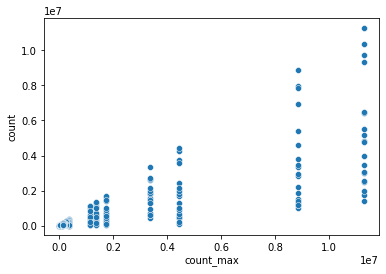

In [42]:
df_age_plt = df_age.reset_index(drop=True)\
    .set_index(["categ_code", "categ_name", "si_code", "si_name", "point", "totalcount"])\
    .stack()\
    .reset_index()\
    .rename(columns={
    "level_6":"sexagegrade",
    0:"count"
})\
    .assign(agegrade = lambda df:df.sexagegrade.str.split("_").str.get(1),
            sex = lambda df:df.sexagegrade.str.split("_").str.get(0))\
    .groupby(["categ_code","si_code","si_name", "agegrade"])\
    ["count"].sum()\
    .reset_index()\
    .assign(count_max = lambda df:df.groupby("si_name")["count"].transform(lambda x:max(x)))
# .loc[:,["count_max","count"]]
# plt.boxplot(df_age_plt)
# df_age_plt
sns.scatterplot(df_age_plt["count_max"],
                df_age_plt["count"])

# 演習
読み込んだデータを使って，以下の処理をおこなってみてください．

(1) 都道府県別データ入院と外来それぞれに対して，E200 (CT撮影）それぞれの撮影法ごとに，どの都道府県が一番CT検査を受けているかをみつけてみてください．

(2) 同様に性・年齢別データに対しても，類似処理を施し，性別問わずどの年齢層が一番 CT 検査を受けているかをみつけてみてください．